In [2]:
#Import all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### I - Virat Kohli Dataset

In [3]:
df = pd.read_csv("virat.csv")

In [4]:
df.head()

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
0,12,33,22,1,0,54.54,2,lbw,1,v Sri Lanka,Dambulla,18-Aug-08
1,37,82,67,6,0,55.22,2,caught,2,v Sri Lanka,Dambulla,20-Aug-08
2,25,40,38,4,0,65.78,1,run out,1,v Sri Lanka,Colombo (RPS),24-Aug-08
3,54,87,66,7,0,81.81,1,bowled,1,v Sri Lanka,Colombo (RPS),27-Aug-08
4,31,45,46,3,1,67.39,1,lbw,2,v Sri Lanka,Colombo (RPS),29-Aug-08


#### Spread in Runs
Question 1: Analyse the spread of Runs scored by Virat in all his matches and report the difference between the scores at the 50th percentile and the 25th percentile respectively.

    a)16.5
    b)22.5
    c)26.5
    d)32.5



In [5]:
df.dtypes

Runs          object
Mins          object
BF             int64
4s             int64
6s             int64
SR            object
Pos            int64
Dismissal     object
Inns           int64
Opposition    object
Ground        object
Start Date    object
dtype: object

In [6]:
df["Runs"][df["Runs"].isna()]

Series([], Name: Runs, dtype: object)

In [7]:
set(df["Runs"])

{'0',
 '1',
 '1*',
 '10',
 '100*',
 '102',
 '102*',
 '105',
 '106',
 '107',
 '11',
 '112*',
 '115',
 '115*',
 '117',
 '118',
 '12',
 '122',
 '123',
 '127',
 '128*',
 '13',
 '136',
 '138',
 '139*',
 '14',
 '15',
 '154*',
 '18',
 '19',
 '2',
 '2*',
 '20',
 '21',
 '22',
 '23',
 '23*',
 '24',
 '25',
 '26',
 '27',
 '28',
 '3',
 '30',
 '31',
 '34',
 '35',
 '37',
 '38',
 '40',
 '43',
 '45',
 '49',
 '53',
 '54',
 '55',
 '57',
 '59',
 '6',
 '61',
 '62',
 '63*',
 '64',
 '65',
 '66',
 '68',
 '68*',
 '7',
 '77',
 '77*',
 '78',
 '8',
 '80',
 '81',
 '82',
 '85*',
 '86',
 '86*',
 '87*',
 '9',
 '91',
 '94',
 '99'}

In [8]:
df.Runs

0       12
1       37
2       25
3       54
4       31
      ... 
127     45
128     65
129    122
130      8
131     55
Name: Runs, Length: 132, dtype: object

In [9]:
# df["Runs"] = 
def convertStrToInt(x):
    if x.rstrip("*") == "":
        return np.nan
    else:
        return int(x.rstrip("*"))
df["Runs"] = df["Runs"].apply(convertStrToInt)

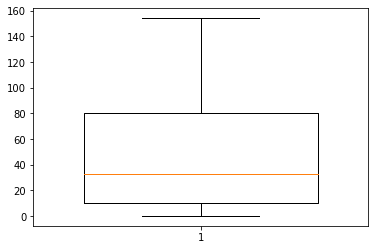

In [10]:
plt.boxplot(df["Runs"],widths=[.7])  # widths increases the size of box; should be less than 1.
plt.show()

####  to get exact percentile measure - 50% value minus 25% value -> 32.5-10 =>22.5

In [11]:
df["Runs"].describe()  

count    132.000000
mean      46.848485
std       41.994635
min        0.000000
25%       10.000000
50%       32.500000
75%       80.250000
max      154.000000
Name: Runs, dtype: float64

#### Box Plots

Question 2: Plot a Box Plot to analyse the spread of Runs that Virat has scored. The upper fence in the box plot lies in which interval?

    a)100-120
    b)120-140
    c)140-160
    d)160-180
<b>Answer</b>: 
Upper fence from above boxplot :  <b>c) 140-160</b>

#### False Statement

Q3:Consider the following statements and choose the correct option

     I - Virat has played the maximum number of matches in 2011
     II - Virat has the highest run average in the year 2017
     III - Virat has the maximum score in a single match and the highest run average in the year 2016.

Which of the above statements is/are false?

    a)I and II
    b)I and III
    c)II
    d)III



In [12]:
from datetime import datetime
df["year"] = df["Start Date"].apply(lambda x: datetime.strptime(x,"%d-%b-%y").year)

#### Statement I:-

In [13]:
df["year"].value_counts()  # 2011 max matches -> True

2011    31
2013    23
2014    17
2010    16
2012    11
2015    10
2016    10
2009     6
2008     5
2017     3
Name: year, dtype: int64

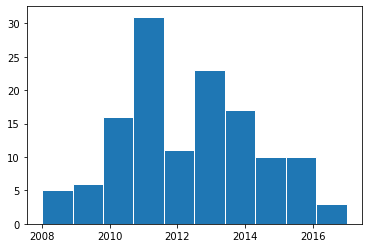

In [14]:
plt.hist(df["year"],edgecolor="white")
plt.show()

#### Statement II:  Virat has the highest run average in the year 2017 

### (Statement 2 is Answer)  Asked for False statement
#### From this below checks we can subdue that Statement 3 is correct.

In [15]:
avg_runs = df.groupby("year")["Runs"].mean() # 2016 is answer with hightest run avg, so statement2 is false.
avg_runs

year
2008    31.800000
2009    38.333333
2010    45.375000
2011    42.000000
2012    40.363636
2013    47.826087
2014    58.529412
2015    30.400000
2016    73.900000
2017    61.666667
Name: Runs, dtype: float64

In [16]:
avg_runs.index.values

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017],
      dtype=int64)

In [17]:
avg_runs.values

array([31.8       , 38.33333333, 45.375     , 42.        , 40.36363636,
       47.82608696, 58.52941176, 30.4       , 73.9       , 61.66666667])

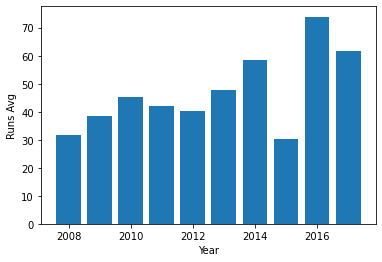

In [18]:
plt.bar(avg_runs.index.values,avg_runs.values)
plt.xlabel("Year")
plt.ylabel("Runs Avg")
plt.show()

#### Maximum Frequency

Q4:Plot a histogram for the Mins column with 15 bins. Among the three ranges mentioned below, which one has the highest frequency?

A - [54.6,68)

B - [68,81.4)

C - [121.6,135)

    a)A - [54.6,68)
    b)B - [68,81.4)
    c)C - [121.6,135)
    d)All the bin ranges have the same frequency


In [19]:
df.dtypes

Runs           int64
Mins          object
BF             int64
4s             int64
6s             int64
SR            object
Pos            int64
Dismissal     object
Inns           int64
Opposition    object
Ground        object
Start Date    object
year           int64
dtype: object

In [20]:
df.head()

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date,year
0,12,33,22,1,0,54.54,2,lbw,1,v Sri Lanka,Dambulla,18-Aug-08,2008
1,37,82,67,6,0,55.22,2,caught,2,v Sri Lanka,Dambulla,20-Aug-08,2008
2,25,40,38,4,0,65.78,1,run out,1,v Sri Lanka,Colombo (RPS),24-Aug-08,2008
3,54,87,66,7,0,81.81,1,bowled,1,v Sri Lanka,Colombo (RPS),27-Aug-08,2008
4,31,45,46,3,1,67.39,1,lbw,2,v Sri Lanka,Colombo (RPS),29-Aug-08,2008


In [21]:
set(df["Mins"])

{'-',
 '1',
 '10',
 '102',
 '104',
 '109',
 '11',
 '110',
 '113',
 '118',
 '12',
 '120',
 '121',
 '122',
 '124',
 '126',
 '128',
 '129',
 '13',
 '131',
 '133',
 '134',
 '135',
 '136',
 '14',
 '147',
 '148',
 '15',
 '152',
 '154',
 '155',
 '157',
 '158',
 '159',
 '16',
 '162',
 '164',
 '174',
 '179',
 '18',
 '187',
 '19',
 '192',
 '193',
 '2',
 '20',
 '202',
 '21',
 '24',
 '25',
 '28',
 '29',
 '3',
 '30',
 '32',
 '33',
 '34',
 '35',
 '36',
 '38',
 '4',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '5',
 '51',
 '53',
 '55',
 '57',
 '6',
 '64',
 '66',
 '67',
 '68',
 '69',
 '7',
 '70',
 '78',
 '80',
 '81',
 '82',
 '83',
 '84',
 '86',
 '87',
 '88',
 '9',
 '93',
 '98',
 '99'}

In [22]:
def convert_mins(x):
    if x=="-":
        return 0
    else:
        return int(x)
mins0 = df["Mins"].apply(convert_mins)
# df["Mins"] = np.sort(df["Mins"])

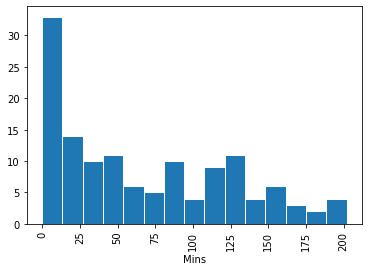

In [24]:
plt.hist(mins0,edgecolor="white",bins=15)
plt.xlabel("Mins")
plt.xticks(rotation=90)
plt.show()

A - [54.6,68)

B - [68,81.4)

C - [121.6,135)

Among these 3 groups - C is the highest (from above plot)

<hr><hr>